<h1>Voltage Divider Circuit</h1>

The voltage divider consists of:<br>
A voltage source (V1) providing the input voltage.<br>
Two resistors (R1 and R2) connected in series.<br>
The output voltage is measured across R2.<br>

In [1]:
import os
os.chdir('D:\\project\\pyams\\pyams_lib')

In [4]:
# Import necessary classes
from models import circuit, Resistor, DCVoltage

# Create a circuit instance
myCircuit = circuit()

# Add elements to the circuit
myCircuit.addElements({
    'V1': DCVoltage('1', '0'),  # Voltage source between node '1' and ground '0'
    'R1': Resistor('1', '2'),   # Resistor R1 between node '1' and '2'
    'R2': Resistor('2', '0')    # Resistor R2 between node '2' and ground '0'
})

# Set parameters for the elements
myCircuit.elem['V1'].setParams("Vdc=10")  # Set input voltage to 10V
myCircuit.elem['R1'].setParams("R=1000")  # Set R1 to 1kΩ
myCircuit.elem['R2'].setParams("R=2000")  # Set R2 to 2kΩ

# Set outputs for plotting (output voltage at node '2')
myCircuit.setOutPuts('2')

# Perform DC analysis (operating point analysis)
myCircuit.analysis(mode='op')
myCircuit.run()
print(myCircuit.elem['V1'].V.value)

# Print the output voltage
output_voltage = myCircuit.x[myCircuit.nodes.index('2') - 1]  # Get voltage at node '2'
print(f"Output Voltage at node '2': {output_voltage:.2f} V")

0.0
Output Voltage at node '2': 0.00 V


[Elapsed Time: 0:00] |████████████████████████████████████████| 100%

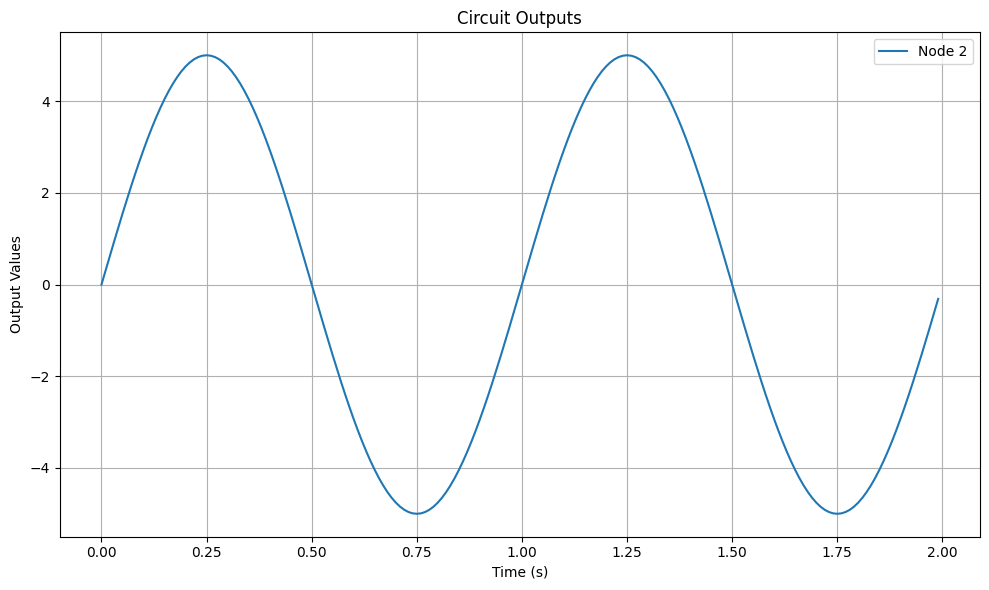

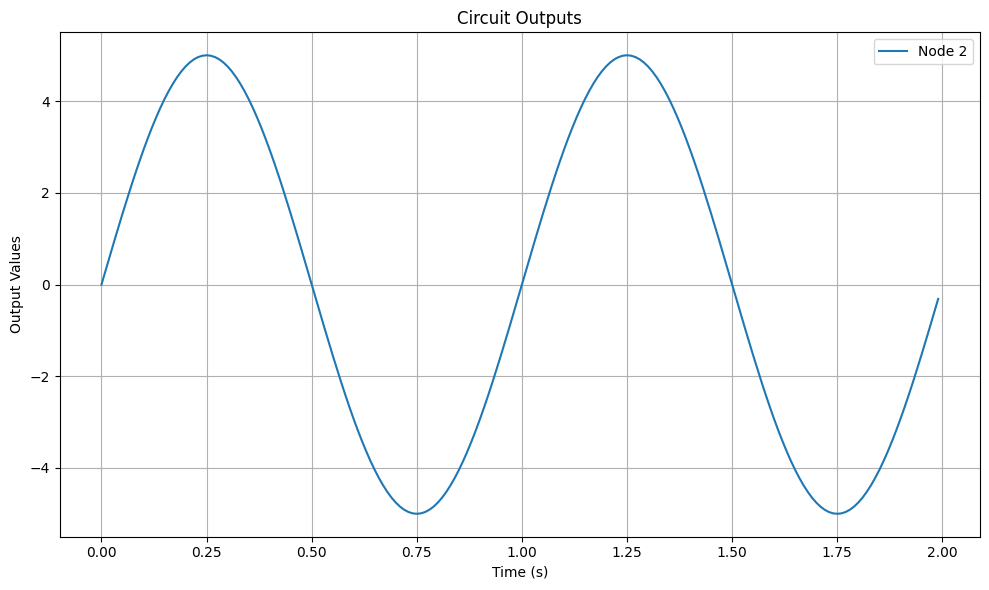

In [3]:
# Import necessary classes
from models import SinVoltage,circuit, Resistor

# Create a circuit instance
myCircuit = circuit()

# Use a sinusoidal voltage source
myCircuit.addElements({
    'V1': SinVoltage('1', '0'),  # Sine wave voltage source
    'R1': Resistor('1', '2'),    # Resistor R1
    'R2': Resistor('2', '0')     # Resistor R2
})

# Set parameters for the sinusoidal source
myCircuit.elem['V1'].setParams("Va=10 Fr=1 Ph=0 Voff=0")  # 10V amplitude, 1Hz frequency

# Set outputs for plotting (output voltage at node '2')
myCircuit.setOutPuts('2')

# Perform transient analysis
myCircuit.analysis(mode='tran', start=0.0, step=0.01, stop=2.0)  # Simulate for 2 seconds
myCircuit.run()

# Plot the results
myCircuit.plot()